In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy
from scipy.special import logsumexp

In [ ]:
def gold_ratio(f, b, counter_F, a = 0, e = 1e-7):
    t = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / t
    Xk2 = Ak + (Bk - Ak) / t
    y1, y2 = f(Xk1), f(Xk2)
    counter_F += 2
    while lk >= e:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
        lk = Bk - Ak
        counter_F += 1
    return (Ak + Bk) / 2, counter_F

In [ ]:
def scalar_mult(u, v):
  sum = 0
  for i in range(0, len(u)):
    sum += u[i]*v[i]
  return sum

In [ ]:
def v(H, W):
  v = np.array([0., 0.])
  for i in range(0, 2):
    for j in range(0, 2):
     v[i] +=  (H[i][j]) * (W[j])
  return v

In [ ]:
def Hesse(x, y):
  H_11 = sympy.diff(sympy.diff(F(x_, y_), x_), x_)
  H_11 = sympy.lambdify((x_, y_), H_11, 'numpy')
  H_12 = sympy.diff(sympy.diff(F(x_, y_), x_), y_)
  H_12 = sympy.lambdify((x_, y_), H_12, 'numpy')
  H_21 = sympy.diff(sympy.diff(F(x_, y_), y_), x_)
  H_21 = sympy.lambdify((x_, y_), H_21, 'numpy')
  H_22 = sympy.diff(sympy.diff(F(x_, y_), y_), y_)
  H_22 = sympy.lambdify((x_, y_), H_22, 'numpy')

  h_11 = lambda X: H_11(X[0], X[1])
  h_12 = lambda X: H_12(X[0], X[1])
  h_21 = lambda X: H_21(X[0], X[1])
  h_22 = lambda X: H_22(X[0], X[1])

  H = np.array([[h_11(X), h_12(X)],[h_21(X), h_22(X)]])
  return H

In [ ]:
def det(H):
  det_H = (H[1,1] * H[0,0] - H[0,1] * H[1,0])
  return det_H

In [ ]:
def inverse(H, det_H):
  H_inv = np.array([[0., 0.], [0., 0.]])
  H_inv[0][0] = H[1][1] / det_H
  H_inv[1][1] = H[0][0] / det_H
  H_inv[0][1] = -H[0][1] / det_H
  H_inv[1][0] = -H[1][0] / det_H
  return H_inv


In [ ]:
def positive_certainty(X):
  H = Hesse(X[0], X[1])
  det_H = det(H)
  if ((H[0,0] <= 0) or (np.linalg.det(H) <= 0)):

    if ((H[0,0] <= 0) and (np.linalg.det(H) > 0)):
      nu = 1.1 * abs(H[0][0])

    if ((H[0,0] > 0) and (np.linalg.det(H) <= 0)):
      D =  (H[0,0] - H[1,1])**2 +  (4*H[0][1]**2)
      nu = 1.1 * (-1 * H[0,0] - H[1,1] + np.sqrt(D))/2;

    if ((H[0,0] <= 0) and (np.linalg.det(H) <= 0)):
      D =  (H[0,0] - H[1,1])**2 + (4*H[0][1]**2)
      nu = max(1.1 * ( -H[0,0] - H[1,1] + np.sqrt(D))/2, 1.1 * abs(H[0,0]));
    H = H + nu * E
  H_inv = inverse(H, det_H)
  return H_inv

In [ ]:
alpha = 1
X = np.array([-1, -2])

#X = np.array([-np.sqrt(5), 0])
#X = np.array([0, 2*np.sqrt(5)])

F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
#F = lambda x, y: 8 * x ** 2 + 5 * y ** 2 - 4 * x * y + 8 * np.sqrt(5) * (x + 2 * y) + 64
f = lambda X: F(X[0], X[1])
w = lambda X: np.array(-grad_F(X[0], X[1]))

x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')


eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
counter_W = 0 #вычисленных антиградиентов
counter_H = 0 #вычисленных матриц Гессе

data = [f(X)]
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

E = np.eye(2)
W = w(X)
normW = np.linalg.norm(W)
counter_W += 1
while (normW > eps):
  H = Hesse(X[0], X[1])
  iterations += 1
  counter_H += 1
  det_H = (H[1,1] * H[0,0] - H[0,1] * H[1,0])
  if ((H[0,0] <= 0) or (np.linalg.det(H) <= 0)):

    if ((H[0,0] <= 0) and (np.linalg.det(H) > 0)):
      nu = 1.1 * abs(H[0][0])

    if ((H[0,0] > 0) and (np.linalg.det(H) <= 0)):
      D =  (H[0,0] - H[1,1])**2 +  (4*H[0][1]**2)
      nu = 1.1 * (-1 * H[0,0] - H[1,1] + np.sqrt(D))/2;

    if ((H[0,0] <= 0) and (np.linalg.det(H) <= 0)):
      D =  (H[0,0] - H[1,1])**2 + (4*H[0][1]**2)
      nu = max(1.1 * ( -H[0,0] - H[1,1] + np.sqrt(D))/2, 1.1 * abs(H[0,0]));
    H = H + nu * E
  H_inv = inverse(H, det_H)
  X = X + v(H_inv, W)
  W = w(X)
  normW = np.linalg.norm(W)
  counter_W += 1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  counter_F += 1
X_min = X


eps =  0.001
x* =  0.9999442934718072 0.9998880511156591
f(x*) =  3.1035077300990964e-09
iterations =  5
counter_F =  6
counter_W =  6
counter_H =  5


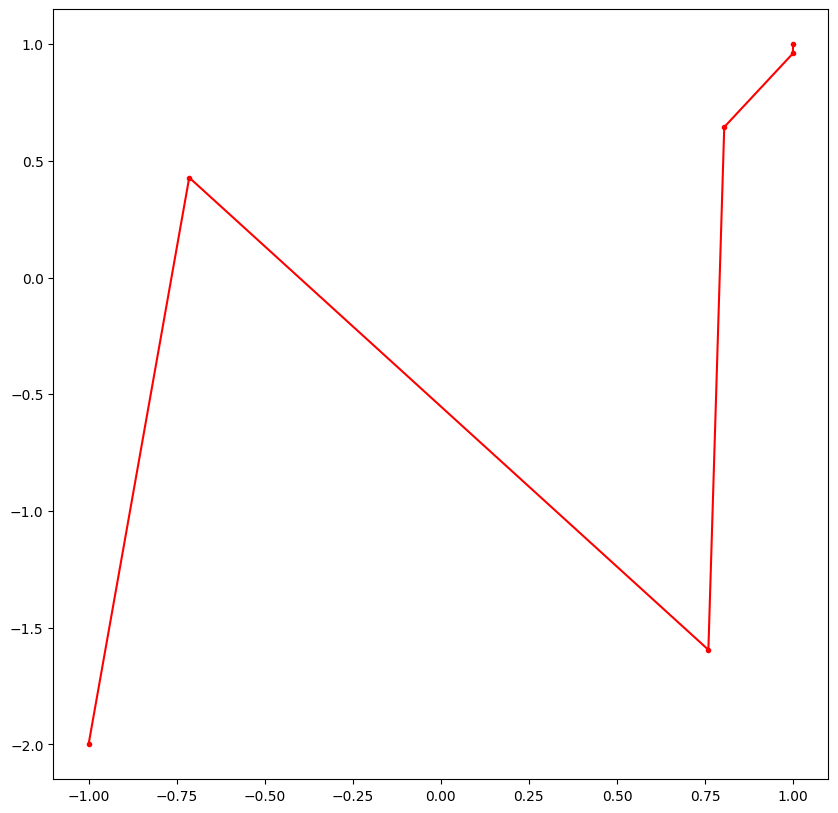

In [ ]:
x_space = np.arange(-10, 10, 0.01)
y_space = np.arange(-10, 10, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = ((xgrid**2-ygrid)**2)+(xgrid-1)**2

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
#axes.contour(xgrid, ygrid, z)
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)
print("counter_W = ", counter_W)
print("counter_H = ", counter_H)

In [ ]:
#метод наискорейшего спуска
def fastest_descent(X, counter_F, counter_W, kappa = 1, eps = 1e-1):
  while (np.linalg.norm(w(X)) > eps):
    wk = w(X)
    p = v(H_inv, wk)
    phi = lambda kappa_: f(X + kappa_ * p)
    kappa, counter_F = gold_ratio(phi, 1, counter_F)
    X = X + kappa * wk
    counter_W += 1
  return kappa, counter_F, counter_W

In [ ]:
#Метод Ньютона с модификацией (метод наискорейшего спуска)
alpha = 1
X = np.array([-1, -2])

#X = np.array([-np.sqrt(5), 0])
#X = np.array([0, 2*np.sqrt(5)])

F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
#F = lambda x, y: 8 * x ** 2 + 5 * y ** 2 - 4 * x * y + 8 * np.sqrt(5) * (x + 2 * y) + 64
f = lambda X: F(X[0], X[1])
w = lambda X: np.array(-grad_F(X[0], X[1]))

x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')


eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
counter_W = 0 #вычисленных антиградиентов
counter_H = 0 #вычисленных матриц Гессе

data = [f(X)]
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

E = np.eye(2)
W = w(X)
normW = np.linalg.norm(W)
counter_W += 1
while (normW > eps):
  iterations += 1
  counter_H += 1
  H_inv = positive_certainty(X)

  p = v(H_inv, W)
  phi = lambda kappa_: f(X + kappa_ * p)
  kappa, counter_F = gold_ratio(phi, 1, counter_F)
  X = X + kappa*p
  W = w(X)
  normW = np.linalg.norm(W)
  counter_W += 1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  counter_F += 1
X_min = X

eps =  0.001
x* =  0.9999987065858076 0.9999969678813618
f(x*) =  1.87120517270051e-12
iterations =  7
counter_F =  260
counter_W =  8
counter_H =  7


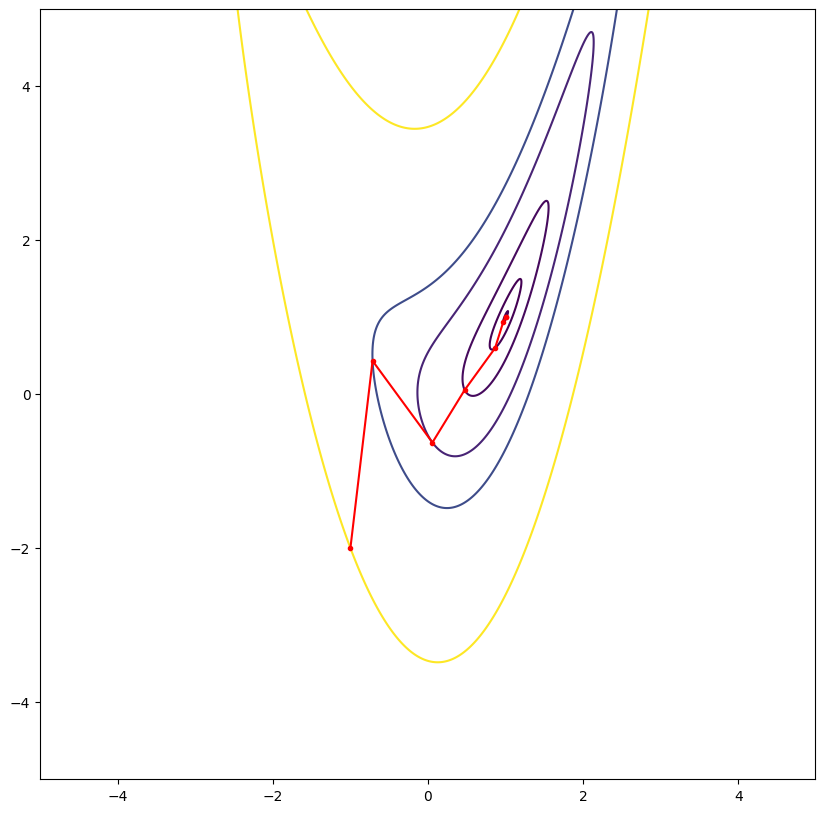

In [ ]:
x_space = np.arange(-5, 5, 0.01)
y_space = np.arange(-5, 5, 0.01)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = ((xgrid**2-ygrid)**2)+(xgrid-1)**2

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)
print("counter_W = ", counter_W)
print("counter_H = ", counter_H)

In [ ]:
def droblenie_shaga(X, counter_F, counter_W, kappa = 1, g = 0.49, v = 0.3, eps = 1e-1):
  while (np.linalg.norm(w(X)) > eps):
    wk = w(X)
    X_n = X + kappa * wk
    U = f(X)
    delta = U - f(X_n)
    if delta < v * kappa * (np.linalg.norm(wk)**2):
      while delta < v * kappa * (np.linalg.norm(wk)**2):
        kappa = kappa * g
        X_n = X + kappa * wk
        delta = U - f(X_n)
        counter_F += 1
    X = X_n
    counter_F += 1
    counter_W += 1
  return kappa, counter_F, counter_W

In [ ]:
#Метод Ньютона с модификацией (метод дробления шага)
g, o = 0.49, 0.3
alpha = 1000000
X = np.array([-1, -2])

#X = np.array([-np.sqrt(5), 0])
#X = np.array([0, 2*np.sqrt(5)])

F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
#F = lambda x, y: 8 * x ** 2 + 5 * y ** 2 - 4 * x * y + 8 * np.sqrt(5) * (x + 2 * y) + 64
f = lambda X: F(X[0], X[1])
w = lambda X: np.array(-grad_F(X[0], X[1]))

x_, y_ = sympy.Symbol('x'), sympy.Symbol('y')
grad_F = sympy.tensor.array.derive_by_array(F(x_, y_), (x_, y_))
grad_F = sympy.lambdify((x_, y_), grad_F, 'numpy')


eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
counter_W = 0 #вычисленных антиградиентов
counter_H = 0 #вычисленных матриц Гессе

data = [f(X)]
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

E = np.eye(2)
W = w(X)
normW = np.linalg.norm(W)
counter_W += 1
while (normW > eps):
  kappa = 1
  iterations += 1
  counter_H += 1
  H_inv = positive_certainty(X)
  p = v(H_inv, W)
  X_n = X + kappa*p
  U = f(X)
  delta = U - f(X_n)
  while delta < o * kappa * scalar_mult(W, p):
    kappa = kappa * g
    X_n = X + kappa * p
    delta = U - f(X_n)
    counter_F += 1
  X = X_n
  W = w(X)
  normW = np.linalg.norm(W)
  counter_W += 1
  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  counter_F += 1
X_min = X

NameError: ignored

eps =  0.001
x* =  0.9999999992639638 0.9999999985270468
f(x*) =  1.3174521510178627e-18
iterations =  334
counter_F =  470
counter_W =  335
counter_H =  334


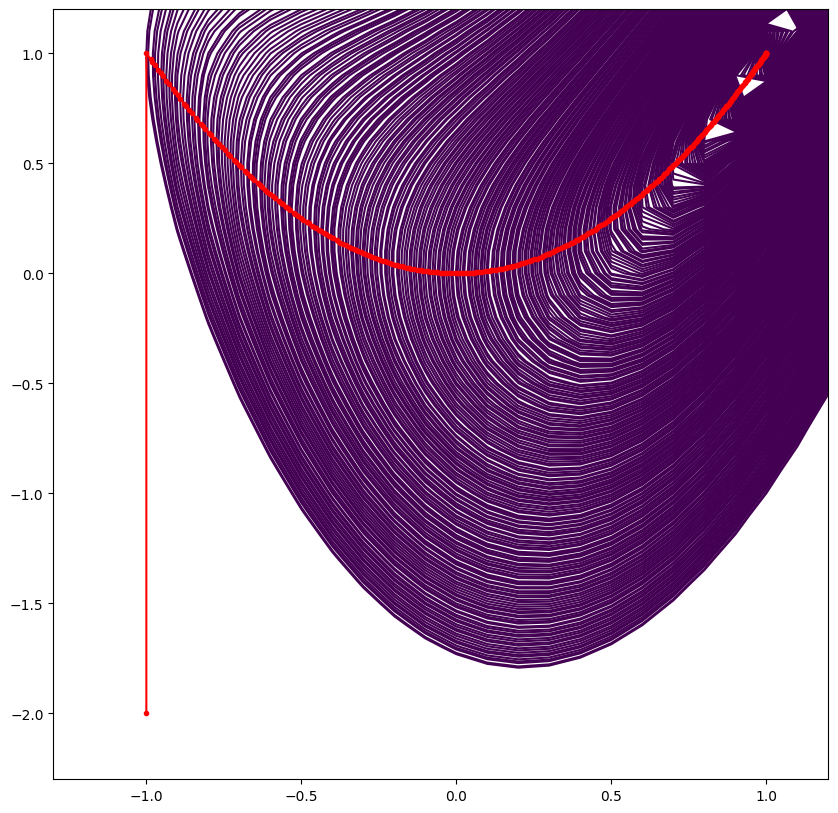

In [ ]:

x_space = np.arange(min(X_line)-0.3, max(X_line)+0.3, 0.1)
y_space = np.arange(min(Y_line)-0.3, max(Y_line)+0.3, 0.1)
xgrid, ygrid = np.meshgrid(x_space, y_space)
z = (((xgrid**2-ygrid)**2)+(xgrid-1)**2)

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)
print("counter_W = ", counter_W)
print("counter_H = ", counter_H)